In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


import numpy as np

Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2

import seaborn as sns
import matplotlib.pyplot as plt

from mplh import cluster_help

fig_utils from mplh
here


In [4]:
os.chdir(ROOT_DIR)

## Files setup

In [5]:
het = 0.2

In [6]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_0"
num_reads = 200
cellr="True"
in_prefix = f'2020_11_18'
pbmc_j = "PBMC_J"
pbmc_p = "PBMC_P"



pbmc_j_indir = join(indir, in_prefix, pbmc_j,mapq,f"cellr_{cellr}")
pbmc_p_indir = join(indir, in_prefix, pbmc_p,mapq,f"cellr_{cellr}")

# sc_coverage_pbmc_j_f = join(pbmc_j_indir,"scPileup_concat_200",pbmc_j+"_200_all.coverage.txt.gz")
# sc_coverage_pbmc_p_f = join(pbmc_p_indir,"scPileup_concat_200",pbmc_p + "_200_all.coverage.txt.gz")
coverage_pbmc_j_dir = join(indir, in_prefix, pbmc_j, mapq, f"{pbmc_j}_scPileup_{num_reads}")
coverage_pbmc_p_dir = join(indir, in_prefix, pbmc_p, mapq, f"{pbmc_p}_scPileup_{num_reads}")

concat_pbmc_j_dir = join(pbmc_j_indir,f"{pbmc_j}_{num_reads}")
concat_pbmc_p_dir = join(pbmc_p_indir,f"{pbmc_p}_{num_reads}")

mgatk_variants_pbmc_j = join(pbmc_j_indir,f'{pbmc_j}_{num_reads}',f'{pbmc_j}.af.tsv')
mgatk_variants_pbmc_p = join(pbmc_p_indir,f'{pbmc_p}_{num_reads}',f'{pbmc_p}.af.tsv')

In [7]:
pbmc_p_AF_by_cell = pd.read_csv(mgatk_variants_pbmc_p, sep='\t')
pbmc_p_AF_by_cell

,AAACGAAAGCTCGTTA-1,AAACGAAGTCCAGACC-1,AAACTGCCACTCCACT-1,AAAGGATAGGGAGTTC-1,AAATGCCCACTTATGG-1,AACAGTCCAGTCCTGG-1,AACAGTCTCATTCGGA-1,AACATCGGTCATTGGT-1,AACCAACTCGGGTCCA-1,AACCTTTGTGCTTACA-1,...,TTCTGTAAGGCACCTC-1,TTGAGTGTCGCTACCT-1,TTGCACCGTCAGGCTC-1,TTGCCCAGTAAAGGCC-1,TTGCCCATCGTTCAGA-1,TTGCTTATCCTAAGTG-1,TTTACGTCAGGATGTG-1,TTTACGTCAGTTCGGC-1,TTTGCGCCAACTCGAT-1,TTTGGTTAGTAGGAAG-1
3T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
8G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11C>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
12T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16559A>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.002486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
16560C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
16563C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
16565C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00303


In [8]:
pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[~(pbmc_p_AF_by_cell<het).all(axis=1)]

### A. AF no removal

cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

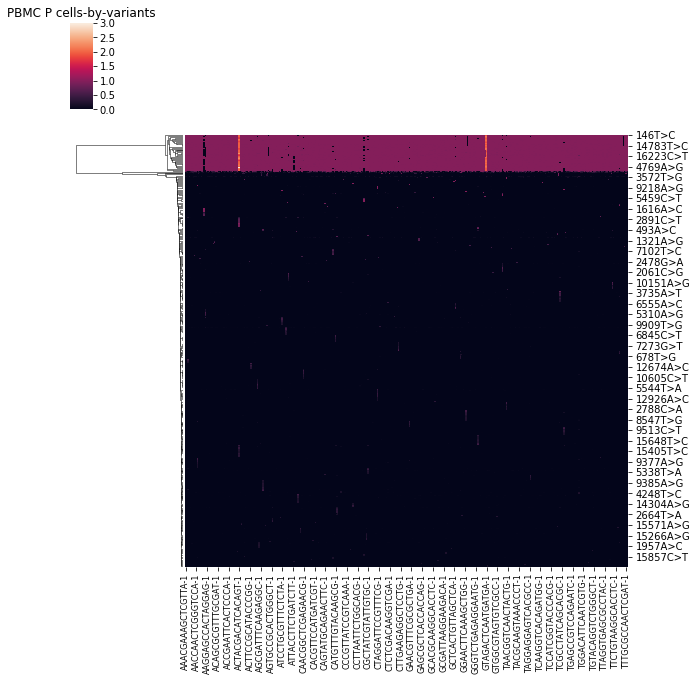

In [9]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_p_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

### B. AF remove the high occuring variants

cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

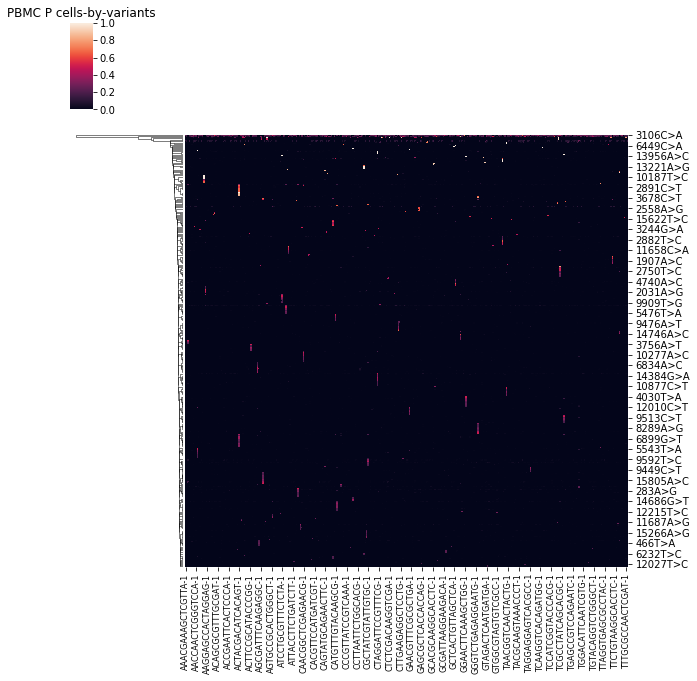

In [10]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_p_AF_by_cell.loc[~((pbmc_p_AF_by_cell>0.8).sum(axis=1)>200)], row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

### C. AF Binarized and removal of high occuring variants

cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

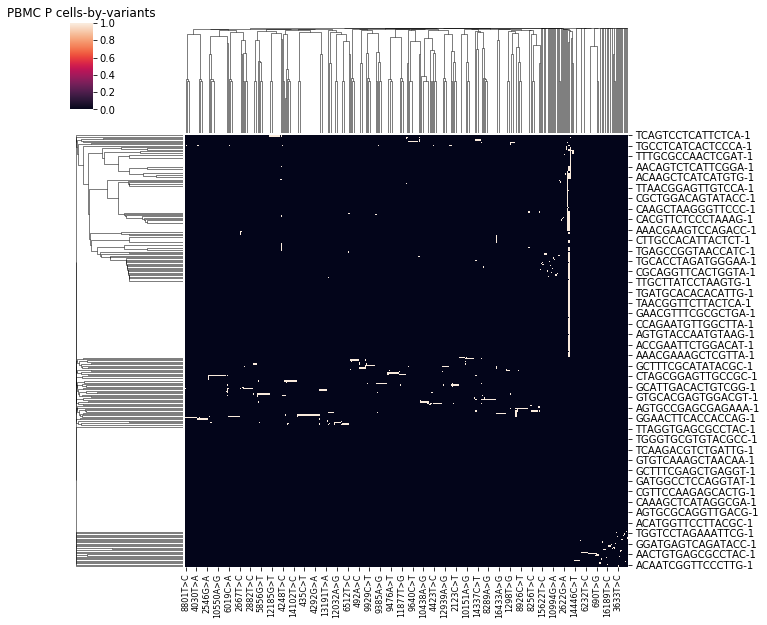

In [11]:
%matplotlib inline
bin_pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.copy()
bin_pbmc_p_AF_by_cell[bin_pbmc_p_AF_by_cell>=0.05] = 1
bin_pbmc_p_AF_by_cell[bin_pbmc_p_AF_by_cell<0.05] = 0
cluster_help.plot_cluster(df=bin_pbmc_p_AF_by_cell.loc[~((bin_pbmc_p_AF_by_cell>0.8).sum(axis=1)>200)].transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

### D. AF Binarized and inclusion of high occuring variants

cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

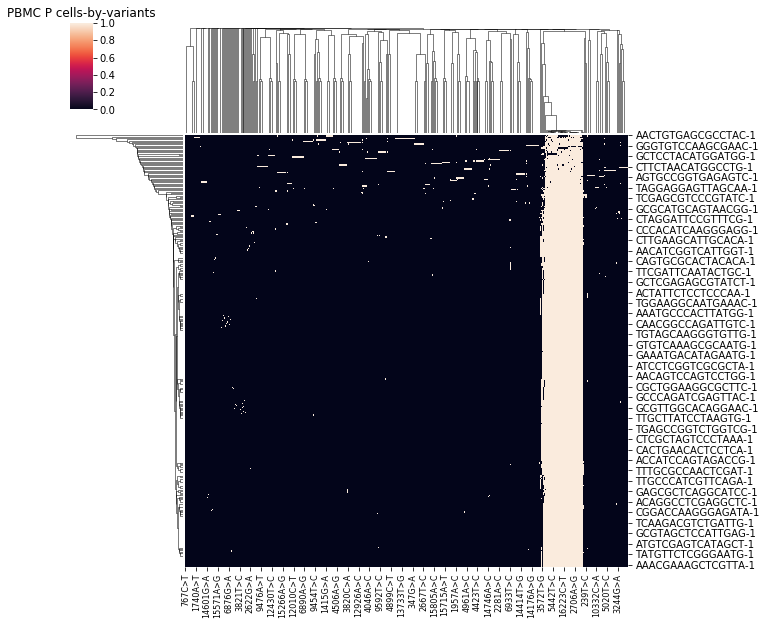

In [12]:
%matplotlib inline
bin_pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.copy()
bin_pbmc_p_AF_by_cell[bin_pbmc_p_AF_by_cell>=0.05] = 1
bin_pbmc_p_AF_by_cell[bin_pbmc_p_AF_by_cell<0.05] = 0
cluster_help.plot_cluster(df=bin_pbmc_p_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

## PBMC J

In [13]:
pbmc_j_AF_by_cell = pd.read_csv(mgatk_variants_pbmc_j, sep='\t')
pbmc_j_AF_by_cell

,AAACGAAGTGTCCCAG-1,AAACTGCGTAGCGTTT-1,AAAGATGAGTCCGGAA-1,AAAGATGCAGGGCTTC-1,AAAGATGCATGTGGGA-1,AAAGGATAGCAGGAGG-1,AAAGGATGTGAATACA-1,AAAGGATGTGCTTTGA-1,AAAGGATTCACCGCGA-1,AAAGGGCCATTGAACC-1,...,TTGTTCACATTATGGC-1,TTGTTGTCATAGCCGC-1,TTGTTGTGTGAGTTGG-1,TTGTTGTTCTTGCGCT-1,TTTACGTGTCACAGGA-1,TTTACGTGTCCGCTTT-1,TTTGAGGGTTTGTAGC-1,TTTGCGCCAACTCGAT-1,TTTGGCCCACCGAAAG-1,TTTGTGTGTGCGTCCA-1
3T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
8G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
9G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
10T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
11C>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16559A>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.009677,0.0
16560C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
16564A>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0
16565C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0


In [14]:
pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.loc[~(pbmc_j_AF_by_cell<het).all(axis=1)]

### A. AF no removal

cmap None


Text(0.5, 1, 'PBMC J cells-by-variants')

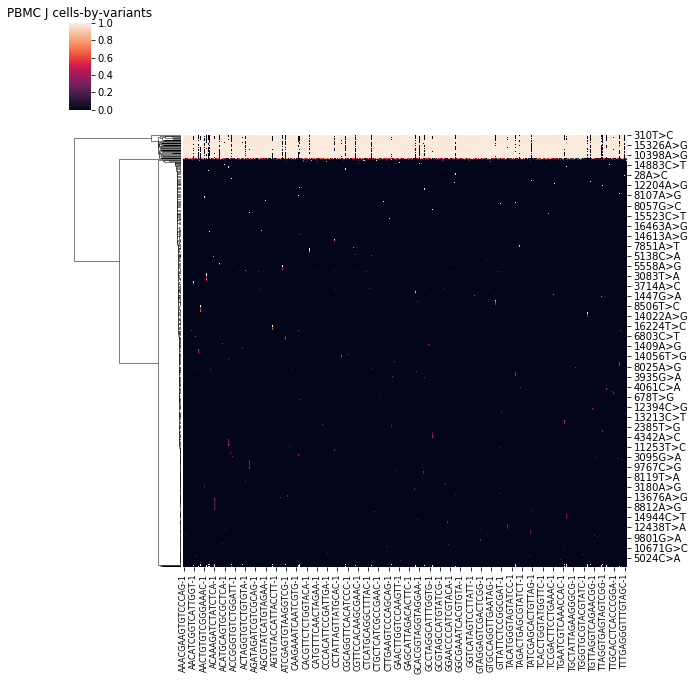

In [15]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_j_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC J cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

### B. AF remove the high occuring variants

cmap None


Text(0.5, 1, 'PBMC J cells-by-variants')

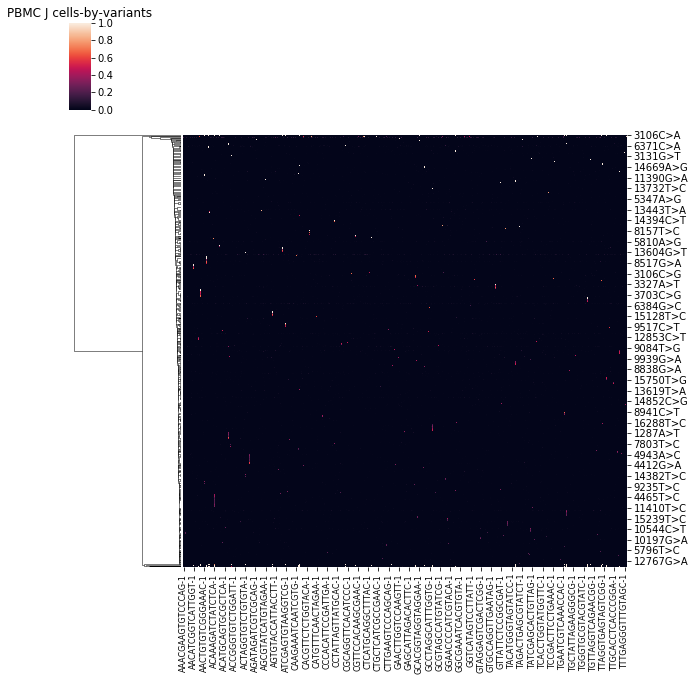

In [16]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_j_AF_by_cell.loc[~((pbmc_j_AF_by_cell>0.8).sum(axis=1)>200)], row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC J cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

### C. AF Binarized and removal of high occuring variants

cmap None


Text(0.5, 1, 'PBMC J cells-by-variants')

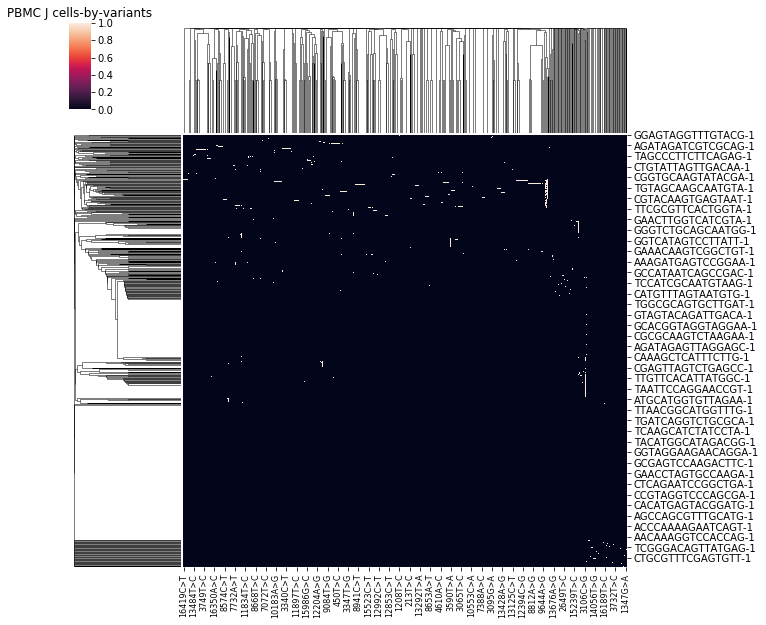

In [17]:
%matplotlib inline
bin_pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.copy()
bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell>=0.05] = 1
bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell<0.05] = 0
cluster_help.plot_cluster(df=bin_pbmc_j_AF_by_cell.loc[~((bin_pbmc_j_AF_by_cell>0.8).sum(axis=1)>200)].transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC J cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

### D. AF Binarized and inclusion of high occuring variants

cmap None


Text(0.5, 1, 'PBMC J cells-by-variants')

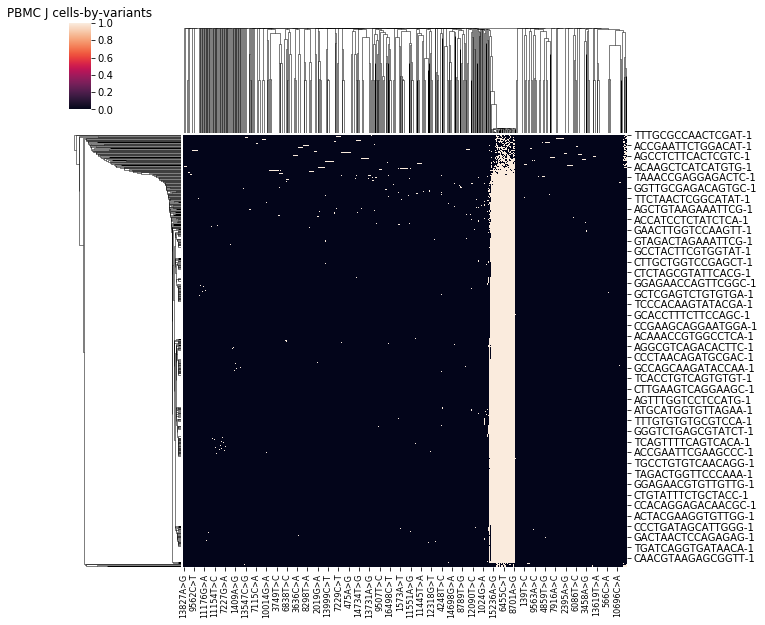

In [18]:
%matplotlib inline
bin_pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.copy()
bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell>=0.05] = 1
bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell<0.05] = 0
cluster_help.plot_cluster(df=bin_pbmc_j_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC J cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))